<a href="https://colab.research.google.com/github/CandidoJr209/Autoencoders/blob/main/MNIST_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # Load the MNIST data

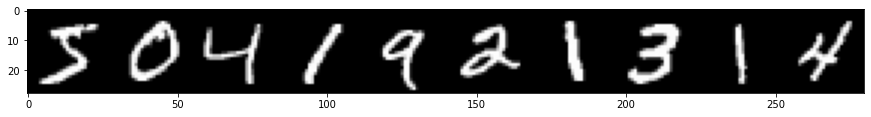

In [ ]:
# Display 10 first images of the training set

hstack = np.concatenate(([x_train[i] for i in range(10)]), axis=1)
plt.figure(figsize=(15, 10))
plt.imshow(hstack, cmap='gray')

In [ ]:
# Normalize the data

x_test = x_test / 255.0
x_train = x_train / 255.0

In [ ]:
# Build the autoencoder

encoder_input = keras.Input(shape=(28,28,1),name="img") # Define input shape
x = keras.layers.Flatten()(encoder_input)     # Flatten the input
encoder_out = keras.layers.Dense(64, activation='relu')(x)    # Define the size of the hidden layer
encoder = keras.Model(encoder_input,encoder_out,name='encoder')  # Define encoder model

decoder_input = keras.layers.Dense(784, activation='relu')(encoder_out)  # Define decoder output = image size
decoder_output = keras.layers.Reshape((28,28,1))(decoder_input)    #  Reshape image


opt = keras.optimizers.Adam(lr=0.001, decay=1e-6)  # Create optimizer

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')  #  Define autoencoder model

In [ ]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(opt,loss='mse')

In [ ]:
autoencoder.fit(x_train,x_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0266 - val_loss: 0.0108
Epoch 2/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0106 - val_loss: 0.0100
Epoch 3/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0099 - val_loss: 0.0097


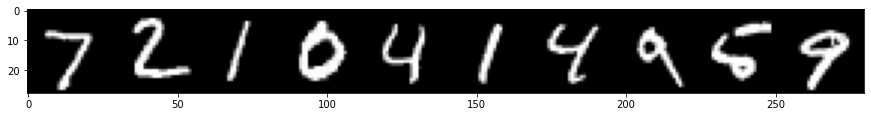

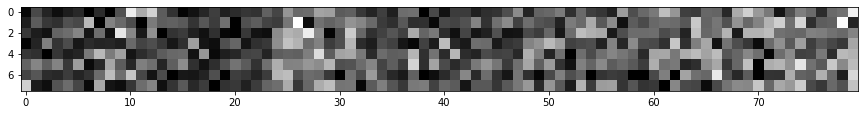

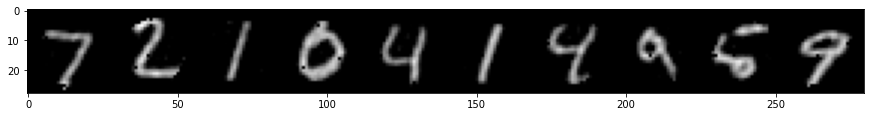

In [ ]:
# Display 10 first images of test set
plt.figure(figsize=(15, 10))
hstack = [x_test[i] for i in range(10)]
hstack = np.concatenate((hstack_1), axis=1)
plt.imshow(hstack, cmap='gray')

# Display 10 first images of encoded test set

plt.figure(figsize=(15, 10))
samples = lambda i : [x_test[i].reshape(-1,28,28,1)]
hstack = [encoder.predict(samples(i))[0].reshape(8,8) for i in range(10)]
hstack = np.concatenate((hstack_1), axis=1)
plt.imshow(hstack, cmap='gray')

# Display 10 first images of decoded test set

plt.figure(figsize=(15, 10))
samples = lambda i : [x_test[i].reshape(-1,28,28,1)]
hstack = [autoencoder.predict(samples(i))[0].reshape(28,28) for i in range(10)]
hstack = np.concatenate((hstack_1), axis=1)
plt.imshow(hstack, cmap='gray')